<a href="https://colab.research.google.com/github/HarshESC/TalkData-Mobile-Demographics/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_regression, chi2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.svm import SVC

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Final Capstone"


Mounted at /content/gdrive
/content/gdrive/My Drive/Final Capstone


# Small EDA

In [ ]:
master_df = pd.read_csv("master_clean.csv")

master_df.head()

,event_id,app_id,is_active,device_id,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal,num_group
0,198,-8807740666788515175,0,6984152891252102027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,198,-7415261454408512527,0,6984152891252102027,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,198,-6538188762242952077,1,6984152891252102027,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,198,-6493194103110420302,0,6984152891252102027,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,198,-6349602347932703147,0,6984152891252102027,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [ ]:
# Dropping AppID as I don't think it will be helpful for our question
master_df = master_df.drop(columns=["app_id"])


In [ ]:

master_df["num_group"].value_counts()


5     2842
4     2690
3     1366
1     1250
2      885
11     857
10     683
0      637
9      403
8      282
6      194
7      142
Name: num_group, dtype: int64

In [ ]:
numerical_columns = ["device_id", "event_id"]


# Select K Best

In [ ]:
# splitting up the data and choosing num_group as target variable
X = master_df.drop(columns=["num_group"])
y = master_df["num_group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=13, stratify=y
)


In [ ]:
# set up preprocessing for pipeline (used to scale features)
preprocessing = ColumnTransformer(
    [("scale", StandardScaler(), numerical_columns),], remainder="passthrough",
)



## Random Forest Classifier

In [ ]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("rf", RandomForestClassifier())], verbose=True
)

pipeline.fit(X_train, y_train)


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   1.3s


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['device_id', 'event_id'])],
                                   verbose=False)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Grid search

In [ ]:
# Max depth of 50 provides a better score, this is much better than the previous score of around 0.2.
# To improve score suggest increasing max depth even more
grid = {
    "rf__max_depth": [50, 70, 90, 110],
    "rf__n_estimators": [1, 10, 100],
    "rf__min_samples_leaf": [1, 3, 5, 7],
    "rf__criterion": ["gini"],
}

model = GridSearchCV(pipeline, grid, n_jobs=-1, verbose=True)
model.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.1min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   1.1s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scale',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['device_id',
                                                                 

In [ ]:
model.best_params_


{'rf__criterion': 'gini',
 'rf__max_depth': 50,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 100}

In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 1.0
Test score: 0.9852881078872088


In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actual M22-",
        "Actual M23-26",
        "Actual M27-28",
        "Actual M29-31",
        "Actual M32-38",
        "Actual M39+",
        "Actual F23-",
        "Actual F24-26",
        "Actual F27-28",
        "Actual F29-32",
        "Actual F33-42",
        "Actual F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)




,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actual M22-,125,0,0,1,0,1,0,0,0,0,0,0
Actual M23-26,0,248,0,0,1,0,0,0,0,1,0,0
Actual M27-28,0,0,175,0,1,1,0,0,0,0,0,0
Actual M29-31,2,1,0,263,4,1,0,0,0,0,0,2
Actual M32-38,0,0,0,0,535,2,0,1,0,0,0,0
Actual M39+,0,1,1,0,0,566,0,0,0,0,1,0
Actual F23-,0,0,0,1,0,0,38,0,0,0,0,0
Actual F24-26,0,0,0,0,2,0,0,26,0,0,0,0
Actual F27-28,0,1,0,0,0,1,0,0,54,0,0,0
Actual F29-32,1,1,0,0,0,0,0,0,0,79,0,0


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       127
           1       0.98      0.99      0.99       250
           2       0.99      0.99      0.99       177
           3       0.99      0.96      0.97       273
           4       0.98      0.99      0.99       538
           5       0.99      0.99      0.99       569
           6       1.00      0.97      0.99        39
           7       0.96      0.93      0.95        28
           8       1.00      0.96      0.98        56
           9       0.99      0.98      0.98        81
          10       0.99      1.00      1.00       137
          11       0.99      0.96      0.97       172

    accuracy                           0.99      2447
   macro avg       0.99      0.98      0.98      2447
weighted avg       0.99      0.99      0.99      2447



#K-Nearest Neighbor Classification

In [ ]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("knn", KNeighborsClassifier())], verbose=True
)

pipeline.fit(X_train, y_train)


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.1s


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['device_id', 'event_id'])],
                                   verbose=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=True)

In [ ]:
grid = {
    "knn__n_neighbors": [50, 100, 150],
    "knn__weights": ["distance"],
    "knn__leaf_size": [1, 10, 20],
}

model = GridSearchCV(pipeline, grid, n_jobs=-1, verbose=2, cv=2)
model.fit(X_train, y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.9min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.2s


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scale',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['device_id',
                                                                    

In [ ]:
# It seems like the higher the amount of n_neighbors the better the score, for next test, will increase n_neighbors
model.best_params_


{'knn__leaf_size': 1, 'knn__n_neighbors': 50, 'knn__weights': 'distance'}

In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 1.0
Test score: 0.8602370249284839


In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actual M22-",
        "Actual M23-26",
        "Actual M27-28",
        "Actual M29-31",
        "Actual M32-38",
        "Actual M39+",
        "Actual F23-",
        "Actual F24-26",
        "Actual F27-28",
        "Actual F29-32",
        "Actual F33-42",
        "Actual F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)


,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actual M22-,115,1,0,3,3,5,0,0,0,0,0,0
Actual M23-26,3,223,0,2,4,15,0,0,0,1,2,0
Actual M27-28,1,6,152,0,1,15,0,0,0,0,1,1
Actual M29-31,7,1,1,221,12,26,0,0,2,0,2,1
Actual M32-38,0,3,0,17,470,36,0,3,0,1,2,6
Actual M39+,0,2,0,9,26,515,0,0,0,5,12,0
Actual F23-,0,0,0,2,0,2,35,0,0,0,0,0
Actual F24-26,0,0,0,0,2,5,0,21,0,0,0,0
Actual F27-28,0,3,0,5,0,3,0,0,43,0,0,2
Actual F29-32,0,0,1,0,1,7,0,0,0,71,1,0


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       127
           1       0.93      0.89      0.91       250
           2       0.98      0.86      0.92       177
           3       0.83      0.81      0.82       273
           4       0.87      0.87      0.87       538
           5       0.78      0.91      0.84       569
           6       0.95      0.90      0.92        39
           7       0.84      0.75      0.79        28
           8       0.96      0.77      0.85        56
           9       0.91      0.88      0.89        81
          10       0.84      0.82      0.83       137
          11       0.92      0.74      0.82       172

    accuracy                           0.86      2447
   macro avg       0.89      0.84      0.86      2447
weighted avg       0.87      0.86      0.86      2447



# Decision Tree Classifier

In [ ]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("dtc", DecisionTreeClassifier())], verbose=True
)

pipeline.fit(X_train, y_train)


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing dtc, total=   0.1s


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['device_id', 'event_id'])],
                                   verbose=False)),
                ('dtc',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
      

In [ ]:
# Max depth of 50 provides a better score, this is much better than the previous score of around 0.2.
# To improve score suggest increasing max depth even more
grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}


model = GridSearchCV(DecisionTreeClassifier(random_state=42), grid, verbose=1, cv=3)


In [ ]:
model.fit(X_train, y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   33.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [ ]:
model.best_params_


{'max_leaf_nodes': 99, 'min_samples_split': 2}

In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 0.8423957481602616
Test score: 0.8406211687780957


In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actual M22-",
        "Actual M23-26",
        "Actual M27-28",
        "Actual M29-31",
        "Actual M32-38",
        "Actual M39+",
        "Actual F23-",
        "Actual F24-26",
        "Actual F27-28",
        "Actual F29-32",
        "Actual F33-42",
        "Actual F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)


,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actual M22-,93,0,5,0,18,0,0,0,0,0,7,4
Actual M23-26,0,219,0,0,16,11,0,0,0,0,0,4
Actual M27-28,0,5,139,6,21,6,0,0,0,0,0,0
Actual M29-31,0,0,8,184,18,63,0,0,0,0,0,0
Actual M32-38,0,0,0,17,502,12,0,0,7,0,0,0
Actual M39+,9,0,2,0,3,540,0,0,0,0,0,15
Actual F23-,0,0,0,0,10,0,29,0,0,0,0,0
Actual F24-26,0,0,0,0,8,0,0,20,0,0,0,0
Actual F27-28,0,11,0,8,14,0,0,0,23,0,0,0
Actual F29-32,0,0,0,8,0,0,0,0,0,73,0,0


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       127
           1       0.92      0.88      0.90       250
           2       0.86      0.79      0.82       177
           3       0.81      0.67      0.74       273
           4       0.81      0.93      0.87       538
           5       0.79      0.95      0.86       569
           6       1.00      0.74      0.85        39
           7       1.00      0.71      0.83        28
           8       0.77      0.41      0.53        56
           9       1.00      0.90      0.95        81
          10       0.94      0.78      0.85       137
          11       0.85      0.74      0.79       172

    accuracy                           0.84      2447
   macro avg       0.89      0.77      0.82      2447
weighted avg       0.85      0.84      0.84      2447



# Support Vector Classifier

In [ ]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("svcc", SVC())], verbose=True
)

pipeline.fit(X_train, y_train)


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing svcc, total=  13.3s


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['device_id', 'event_id'])],
                                   verbose=False)),
                ('svcc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
        

In [ ]:
grid = { "svcc__gamma": [1.0, 5.0, 10.0], 'svcc__kernel': ['rbf']}


model = GridSearchCV(pipeline, grid, verbose=1, cv=3)

In [ ]:
model.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Pipeline] .............. (step 2 of 2) Processing svcc, total=  11.9s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing svcc, total=  11.9s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing svcc, total=  11.9s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing svcc, total=  11.9s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing svcc, total=  12.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing svcc, total=  12.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing svcc, total=  11.9s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipel

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.2min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing svcc, total=  25.0s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scale',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['device_id',
                                                                    

In [ ]:
model.best_params_


{'svcc__gamma': 1.0, 'svcc__kernel': 'rbf'}

In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actual M22-",
        "Actual M23-26",
        "Actual M27-28",
        "Actual M29-31",
        "Actual M32-38",
        "Actual M39+",
        "Actual F23-",
        "Actual F24-26",
        "Actual F27-28",
        "Actual F29-32",
        "Actual F33-42",
        "Actual F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)


,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actual M22-,76,5,0,11,7,28,0,0,0,0,0,0
Actual M23-26,3,190,6,9,13,28,0,0,0,0,1,0
Actual M27-28,2,11,133,0,7,23,0,0,0,0,0,1
Actual M29-31,10,3,1,170,26,54,0,0,3,0,4,2
Actual M32-38,1,0,0,24,426,63,0,0,0,6,3,15
Actual M39+,2,8,4,11,40,476,0,1,2,4,19,2
Actual F23-,0,0,0,6,1,11,18,0,0,0,3,0
Actual F24-26,0,0,0,0,1,13,0,13,0,0,1,0
Actual F27-28,0,2,0,8,0,15,0,0,31,0,0,0
Actual F29-32,1,0,2,0,8,19,0,0,0,50,1,0


In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 0.9021872444807849
Test score: 0.7225173682059665


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.60      0.68       127
           1       0.86      0.76      0.81       250
           2       0.89      0.75      0.81       177
           3       0.68      0.62      0.65       273
           4       0.74      0.79      0.77       538
           5       0.61      0.84      0.71       569
           6       0.95      0.46      0.62        39
           7       0.87      0.46      0.60        28
           8       0.86      0.55      0.67        56
           9       0.83      0.62      0.71        81
          10       0.70      0.63      0.66       137
          11       0.82      0.58      0.68       172

    accuracy                           0.72      2447
   macro avg       0.80      0.64      0.70      2447
weighted avg       0.74      0.72      0.72      2447



# Gradient Boosting Classifier

In [ ]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("gb", GradientBoostingClassifier())], verbose=True
)

pipeline.fit(X_train, y_train)


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gb, total=  22.4s


Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['device_id', 'event_id'])],
                                   verbose=False)),
                ('gb',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            le...='deviance',
                                            max_depth=3, max_features=None,
                        

In [ ]:
grid = {'gb__n_estimators': [100], 
          'gb__max_depth': [5],
          'gb__loss': ['deviance']}

model = GridSearchCV(pipeline, grid, verbose=1, cv=3)
model.fit(X_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Pipeline] ................ (step 2 of 2) Processing gb, total=  20.5s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gb, total=  20.2s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gb, total=  20.2s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished


[Pipeline] ................ (step 2 of 2) Processing gb, total=  30.0s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scale',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['device_id',
                                                                    

In [ ]:
model.best_params_

{'gb__loss': 'deviance', 'gb__max_depth': 5, 'gb__n_estimators': 100}

In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 1.0
Test score: 1.0


In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actual M22-",
        "Actual M23-26",
        "Actual M27-28",
        "Actual M29-31",
        "Actual M32-38",
        "Actual M39+",
        "Actual F23-",
        "Actual F24-26",
        "Actual F27-28",
        "Actual F29-32",
        "Actual F33-42",
        "Actual F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)


,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actual M22-,127,0,0,0,0,0,0,0,0,0,0,0
Actual M23-26,0,250,0,0,0,0,0,0,0,0,0,0
Actual M27-28,0,0,177,0,0,0,0,0,0,0,0,0
Actual M29-31,0,0,0,273,0,0,0,0,0,0,0,0
Actual M32-38,0,0,0,0,538,0,0,0,0,0,0,0
Actual M39+,0,0,0,0,0,569,0,0,0,0,0,0
Actual F23-,0,0,0,0,0,0,39,0,0,0,0,0
Actual F24-26,0,0,0,0,0,0,0,28,0,0,0,0
Actual F27-28,0,0,0,0,0,0,0,0,56,0,0,0
Actual F29-32,0,0,0,0,0,0,0,0,0,81,0,0


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       273
           4       1.00      1.00      1.00       538
           5       1.00      1.00      1.00       569
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00        56
           9       1.00      1.00      1.00        81
          10       1.00      1.00      1.00       137
          11       1.00      1.00      1.00       172

    accuracy                           1.00      2447
   macro avg       1.00      1.00      1.00      2447
weighted avg       1.00      1.00      1.00      2447



# PCA Models

In [ ]:
# Since I am performing pca its necessary to standardize data and fit it to data frame.
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Computing the principal components
pca = PCA()
X_pca = pca.fit_transform(X_train_std)


In [ ]:
# I plan to use the amount of components that add up to 90% variance.
n_components = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.90)
X_pca = X_pca[:, :n_components]


In [ ]:
# check to see the amount of components being used
n_components


47

# Random Forest Classifier

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_components)),
        ("rf", RandomForestClassifier()),
    ]
)
pipeline = pipeline.fit(X_train, y_train)


GridSearch

In [ ]:
grid = {
    "rf__max_depth": [90, 110, 130],
    "rf__n_estimators": [1, 10, 100],
    "rf__min_samples_leaf": [1, 3, 5, 7],
    "rf__criterion": ["gini"],
}

model = GridSearchCV(pipeline, grid, n_jobs=-1, cv=2, verbose=2)
model.fit(X_train, y_train)


Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.1min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=47, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                      

In [ ]:
model.best_params_


{'rf__criterion': 'gini',
 'rf__max_depth': 90,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 100}

In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 0.9963205233033524
Test score: 0.8071107478545158


In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actual M22-",
        "Actual M23-26",
        "Actual M27-28",
        "Actual M29-31",
        "Actual M32-38",
        "Actual M39+",
        "Actual F23-",
        "Actual F24-26",
        "Actual F27-28",
        "Actual F29-32",
        "Actual F33-42",
        "Actual F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)


,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actual M22-,101,3,1,4,4,14,0,0,0,0,0,0
Actual M23-26,3,205,4,5,10,16,0,0,3,1,1,2
Actual M27-28,1,8,150,0,7,5,0,0,1,0,3,2
Actual M29-31,7,1,2,216,22,13,0,0,4,1,3,4
Actual M32-38,3,2,1,19,457,35,1,3,0,2,2,13
Actual M39+,11,7,5,19,40,457,0,1,2,7,17,3
Actual F23-,0,0,1,2,0,0,33,0,0,0,3,0
Actual F24-26,1,0,0,1,5,2,0,19,0,0,0,0
Actual F27-28,0,3,0,6,5,4,0,0,38,0,0,0
Actual F29-32,1,0,3,0,6,5,0,0,0,64,2,0


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       127
           1       0.86      0.82      0.84       250
           2       0.88      0.85      0.86       177
           3       0.78      0.79      0.78       273
           4       0.78      0.85      0.81       538
           5       0.81      0.80      0.81       569
           6       0.94      0.85      0.89        39
           7       0.79      0.68      0.73        28
           8       0.79      0.68      0.73        56
           9       0.85      0.79      0.82        81
          10       0.77      0.81      0.79       137
          11       0.82      0.72      0.77       172

    accuracy                           0.81      2447
   macro avg       0.82      0.79      0.80      2447
weighted avg       0.81      0.81      0.81      2447



#K Nearest Neighbor Classifier

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_components)),
        ("knn", KNeighborsClassifier()),
    ]
)
pipeline = pipeline.fit(X_train, y_train)


Grid Search

In [ ]:
grid = {
    "knn__n_neighbors": [50, 100, 150],
    "knn__weights": ["distance"],
    "knn__leaf_size": [1, 10, 20],
}

model = GridSearchCV(pipeline, grid, n_jobs=-1, cv=2, verbose=2)
model.fit(X_train, y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=47, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                         

In [ ]:
model.best_params_


{'knn__leaf_size': 10, 'knn__n_neighbors': 150, 'knn__weights': 'distance'}

In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 0.999795584627964
Test score: 0.7633837351859419


In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actually M22-",
        "Actually M23-26",
        "Actually M27-28",
        "Actually M29-31",
        "Actually M32-38",
        "Actually M39+",
        "Actually F23-",
        "Actually F24-26",
        "Actually F27-28",
        "Actually F29-32",
        "Actually F33-42",
        "Actually F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)


,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actually M22-,97,3,0,4,5,18,0,0,0,0,0,0
Actually M23-26,3,185,2,0,19,33,0,0,0,3,4,1
Actually M27-28,1,10,127,8,12,11,0,0,0,0,5,3
Actually M29-31,7,9,2,192,32,29,0,0,2,0,0,0
Actually M32-38,1,1,1,13,448,54,0,3,0,6,3,8
Actually M39+,8,8,3,8,49,479,0,0,0,5,9,0
Actually F23-,0,0,0,0,2,1,35,0,0,0,1,0
Actually F24-26,2,0,0,1,2,4,0,19,0,0,0,0
Actually F27-28,0,4,0,3,8,4,0,0,31,0,4,2
Actually F29-32,0,4,4,5,3,10,0,0,0,54,1,0


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       127
           1       0.82      0.74      0.78       250
           2       0.89      0.72      0.79       177
           3       0.81      0.70      0.75       273
           4       0.73      0.83      0.78       538
           5       0.69      0.84      0.76       569
           6       0.92      0.90      0.91        39
           7       0.86      0.68      0.76        28
           8       0.94      0.55      0.70        56
           9       0.79      0.67      0.72        81
          10       0.77      0.69      0.73       137
          11       0.88      0.62      0.73       172

    accuracy                           0.76      2447
   macro avg       0.82      0.73      0.76      2447
weighted avg       0.78      0.76      0.76      2447



# Decision Tree Classifier 

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_components)),
        ("dtc", DecisionTreeClassifier()),
    ]
)
pipeline = pipeline.fit(X_train, y_train)



In [ ]:
# Max depth of 50 provides a better score, this is much better than the previous score of around 0.2.
# To improve score suggest increasing max depth even more
grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}


model = GridSearchCV(DecisionTreeClassifier(random_state=42), grid, verbose=1, cv=3)


In [ ]:
model.fit(X_train, y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   33.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [ ]:
model.best_params_

{'max_leaf_nodes': 99, 'min_samples_split': 2}

In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 0.8423957481602616
Test score: 0.8406211687780957


In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actually M22-",
        "Actually M23-26",
        "Actually M27-28",
        "Actually M29-31",
        "Actually M32-38",
        "Actually M39+",
        "Actually F23-",
        "Actually F24-26",
        "Actually F27-28",
        "Actually F29-32",
        "Actually F33-42",
        "Actually F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)


,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actually M22-,93,0,5,0,18,0,0,0,0,0,7,4
Actually M23-26,0,219,0,0,16,11,0,0,0,0,0,4
Actually M27-28,0,5,139,6,21,6,0,0,0,0,0,0
Actually M29-31,0,0,8,184,18,63,0,0,0,0,0,0
Actually M32-38,0,0,0,17,502,12,0,0,7,0,0,0
Actually M39+,9,0,2,0,3,540,0,0,0,0,0,15
Actually F23-,0,0,0,0,10,0,29,0,0,0,0,0
Actually F24-26,0,0,0,0,8,0,0,20,0,0,0,0
Actually F27-28,0,11,0,8,14,0,0,0,23,0,0,0
Actually F29-32,0,0,0,8,0,0,0,0,0,73,0,0


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       127
           1       0.92      0.88      0.90       250
           2       0.86      0.79      0.82       177
           3       0.81      0.67      0.74       273
           4       0.81      0.93      0.87       538
           5       0.79      0.95      0.86       569
           6       1.00      0.74      0.85        39
           7       1.00      0.71      0.83        28
           8       0.77      0.41      0.53        56
           9       1.00      0.90      0.95        81
          10       0.94      0.78      0.85       137
          11       0.85      0.74      0.79       172

    accuracy                           0.84      2447
   macro avg       0.89      0.77      0.82      2447
weighted avg       0.85      0.84      0.84      2447



# Support Vector Classifier

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_components)),
        ("svcc", SVC()),
    ]
)
pipeline = pipeline.fit(X_train, y_train)


In [ ]:
grid = { "svcc__gamma": [1.0, 5.0, 10.0], 'svcc__kernel': ['rbf']}


model = GridSearchCV(pipeline, grid, verbose=1, cv=3)

In [ ]:
model.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=47, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svcc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr

In [ ]:
model.best_params_

{'svcc__gamma': 10.0, 'svcc__kernel': 'rbf'}

In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 0.9440923957481603
Test score: 0.6505925623212097


In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actually M22-",
        "Actually M23-26",
        "Actually M27-28",
        "Actually M29-31",
        "Actually M32-38",
        "Actually M39+",
        "Actually F23-",
        "Actually F24-26",
        "Actually F27-28",
        "Actually F29-32",
        "Actually F33-42",
        "Actually F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)


,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actually M22-,60,5,0,9,10,43,0,0,0,0,0,0
Actually M23-26,7,148,0,4,5,86,0,0,0,0,0,0
Actually M27-28,0,2,108,0,2,65,0,0,0,0,0,0
Actually M29-31,9,0,0,148,23,90,0,0,0,0,3,0
Actually M32-38,0,1,0,16,341,165,0,2,0,0,2,11
Actually M39+,0,1,2,9,30,512,0,1,0,1,11,2
Actually F23-,0,0,0,1,3,14,21,0,0,0,0,0
Actually F24-26,0,0,0,0,6,7,0,15,0,0,0,0
Actually F27-28,0,0,0,4,0,24,0,0,28,0,0,0
Actually F29-32,0,0,0,0,3,29,0,0,0,49,0,0


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.47      0.59       127
           1       0.94      0.59      0.73       250
           2       0.98      0.61      0.75       177
           3       0.74      0.54      0.63       273
           4       0.76      0.63      0.69       538
           5       0.45      0.90      0.60       569
           6       1.00      0.54      0.70        39
           7       0.83      0.54      0.65        28
           8       1.00      0.50      0.67        56
           9       0.98      0.60      0.75        81
          10       0.81      0.55      0.66       137
          11       0.86      0.50      0.63       172

    accuracy                           0.65      2447
   macro avg       0.84      0.58      0.67      2447
weighted avg       0.75      0.65      0.66      2447



# Gradient Boosting Classifier

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_components)),
        ("gb", GradientBoostingClassifier()),
    ]
)
pipeline = pipeline.fit(X_train, y_train)


In [ ]:
grid = {'gb__n_estimators': [100], 
          'gb__max_depth': [5],
          'gb__loss': ['deviance']}

model = GridSearchCV(pipeline, grid, verbose=1, cv=3)
model.fit(X_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=47, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('gb',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                        

In [ ]:
model.best_params_  

{'gb__loss': 'deviance', 'gb__max_depth': 5, 'gb__n_estimators': 100}

In [ ]:
# Model still appears to be extremely overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Train score: 0.9033115290269829
Test score: 0.7711483449121374


In [ ]:
y_pred = model.predict(X_test)

con_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actual M22-",
        "Actual M23-26",
        "Actual M27-28",
        "Actual M29-31",
        "Actual M32-38",
        "Actual M39+",
        "Actual F23-",
        "Actual F24-26",
        "Actual F27-28",
        "Actual F29-32",
        "Actual F33-42",
        "Actual F43+",
    ],
    columns=[
        "Predicted M22-",
        "Predicted M23-26",
        "Predicted M27-28",
        "Predicted M29-31",
        "Predicted M32-38",
        "Predicted M39+",
        "Predicted F23-",
        "Predicted F24-26",
        "Predicted F27-28",
        "Predicted F29-32",
        "Predicted F33-42",
        "Predicted F43+",
    ],
)
con_mat.style.background_gradient(axis=None)


,Predicted M22-,Predicted M23-26,Predicted M27-28,Predicted M29-31,Predicted M32-38,Predicted M39+,Predicted F23-,Predicted F24-26,Predicted F27-28,Predicted F29-32,Predicted F33-42,Predicted F43+
Actual M22-,93,3,1,5,6,19,0,0,0,0,0,0
Actual M23-26,2,205,7,4,9,16,1,0,0,2,1,3
Actual M27-28,4,11,139,2,5,14,0,0,0,0,2,0
Actual M29-31,9,3,2,189,30,27,0,2,2,0,6,3
Actual M32-38,0,1,1,23,435,50,1,6,0,3,3,15
Actual M39+,6,12,4,13,43,463,0,2,1,5,18,2
Actual F23-,0,0,0,2,4,3,25,0,0,0,4,1
Actual F24-26,0,0,0,1,1,7,0,19,0,0,0,0
Actual F27-28,0,3,0,3,3,4,0,0,41,1,0,1
Actual F29-32,1,1,2,0,4,4,0,0,1,67,0,1


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       127
           1       0.84      0.82      0.83       250
           2       0.86      0.79      0.82       177
           3       0.76      0.69      0.72       273
           4       0.76      0.81      0.78       538
           5       0.72      0.81      0.76       569
           6       0.93      0.64      0.76        39
           7       0.61      0.68      0.64        28
           8       0.91      0.73      0.81        56
           9       0.86      0.83      0.84        81
          10       0.74      0.77      0.76       137
          11       0.79      0.62      0.69       172

    accuracy                           0.77      2447
   macro avg       0.80      0.74      0.77      2447
weighted avg       0.78      0.77      0.77      2447



## Let's Compare the models

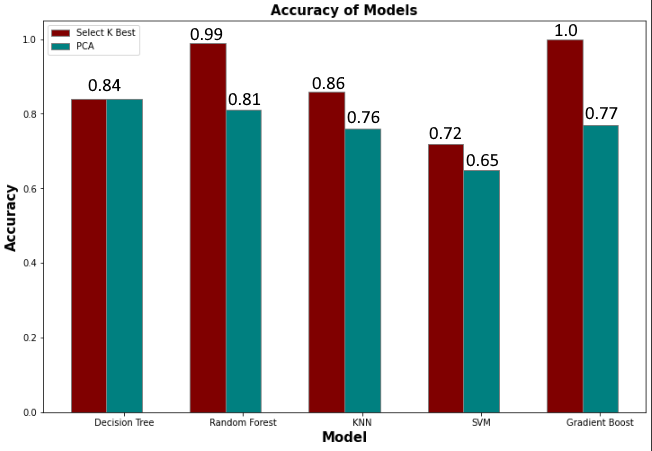

# Analysis



For my classification models, I used the following classification models to predict the age and gender groups:
* Decision Tree
* Random Forest
* K-Nearest Neighbor (KNN)
* Support Vector Machine (SVM)
* Gradient Boosting

I started off by using Select K Best to get the best features.  I then ran each model with the best features from a Grid Search, and calculated Accuracy score based off of F1 Score. A classification report was generated for each result and the scores are sumarrized in the graph above. 

I found that Gradient Boosting provided a perfect Accuracy Score, with Random Forest giving an almost perfect score of 0.99.

Once I obtained results from these models, I used PCA for dimension reductionality to see if my accuracy would improve.  However, this ended up not being the case at all.  In fact, all of the accuracies from PCA ended up significantly hurting the accuracies.  

After comparing the confusion matrices and classification reports for each model, I was able to determine the best model came from using a Gradient Boosting Classifier.  However, Random Forest also proved to be quite effective, so I will be showing both parameters I used.

* Gradient Boosting Parameters:    
{'gb__loss': 'deviance', 'gb__max_depth': 5, 'gb__n_estimators': 100}


* Random Forest Parameters:  
{'rf__criterion': 'gini',
 'rf__max_depth': 50,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 100}

 Due to time constraints, I used a supsample of data sets, so that could have had an impact on the results.  

